# Данные о мировых розничных продажах: заказы, обзоры и тенденции

https://www.kaggle.com/datasets/adarsh0806/influencer-merchandise-sales&resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dt = pd.read_csv("sales.csv", sep = ",")


In [3]:
dt

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Quantity,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,1,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,1,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,1,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,2,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,3,5,Lack of delivery delays is greatly appreciated.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,136943,2023-12-10,BF1548,Clothing,Male,23,Las Vegas,No,65,0,1,4,The product was affordable here compared to ot...
7390,172276,2024-01-24,BF1546,Clothing,Female,26,Manchester,Yes,118,40,1,4,Exquisite craftsmanship here is absolutely app...
7391,160191,2023-12-19,BF1552,Ornaments,Male,19,Miami,No,45,0,1,2,Waste of Money.
7392,195268,2023-12-07,BF1555,Other,Male,34,Miami,No,23,0,1,5,The product was affordable here compared to ot...


Интерпретация данных, записанных в столбцах
 - *Order ID* - Идентификатор заказа
 - *Order Date* - Дата заказа
 - *Product ID* - Идентификатор продукта
 - *Product Category* - Категория продукта
 - *Buyer Gender* - Пол покупателя
 - *Buyer Age* - Возраст покупателя
 - *Order Location* - Местонахождение заказа
 - *International Shipping* - Международная доставка
 - *Sales Price* - Цена продукта
 - *Shipping Charges* - Стоимость доставки
 - *Quantity* - Количество
 - *Rating* - Рейтинг
 - *Review* - Отзыв

In [4]:
dt.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Quantity,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,1,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,1,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,1,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,2,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,3,5,Lack of delivery delays is greatly appreciated.


In [5]:
type(dt)

pandas.core.frame.DataFrame

In [6]:
dt.shape

(7394, 13)

In [7]:
dt.columns

Index(['Order ID', 'Order Date', 'Product ID', 'Product Category',
       'Buyer Gender', 'Buyer Age', 'Order Location', 'International Shipping',
       'Sales Price', 'Shipping Charges', 'Quantity', 'Rating', 'Review'],
      dtype='object')

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Quantity                7394 non-null   int64 
 11  Rating                  7394 non-null   int64 
 12  Review                  7394 non-null   object
dtypes: int64(6), object(7)
memory usage: 751.1+ KB


In [9]:
dt.loc[:,dt.columns != "Order ID"].describe()

,Buyer Age,Sales Price,Shipping Charges,Quantity,Rating
count,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,26.455504,55.165404,14.633487,1.668109,3.499053
std,5.208202,39.575614,24.815719,1.081398,1.389731
min,18.000000,9.000000,0.000000,1.000000,1.000000
25%,22.000000,15.000000,0.000000,1.000000,3.000000
50%,26.000000,65.000000,0.000000,1.000000,4.000000
75%,31.000000,97.000000,40.000000,2.000000,5.000000
max,35.000000,130.000000,100.000000,5.000000,5.000000


Добавим столбец "Продажи на единицу"

In [10]:
dt['Sales per Unit'] = dt['Sales Price'] + dt['Shipping Charges']

In [11]:
dt

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Quantity,Rating,Review,Sales per Unit
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,1,4,The delivery team handled the product with care.,100
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,1,3,Had slight delays but the product was in good ...,100
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,1,2,Waste of Money.,49
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,2,3,Had slight delays but the product was in good ...,9
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,3,5,Lack of delivery delays is greatly appreciated.,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,136943,2023-12-10,BF1548,Clothing,Male,23,Las Vegas,No,65,0,1,4,The product was affordable here compared to ot...,65
7390,172276,2024-01-24,BF1546,Clothing,Female,26,Manchester,Yes,118,40,1,4,Exquisite craftsmanship here is absolutely app...,158
7391,160191,2023-12-19,BF1552,Ornaments,Male,19,Miami,No,45,0,1,2,Waste of Money.,45
7392,195268,2023-12-07,BF1555,Other,Male,34,Miami,No,23,0,1,5,The product was affordable here compared to ot...,23


Добавим столбец "Общий объем продаж"

In [12]:
dt["Total Sales"] = dt['Sales per Unit'] * dt["Quantity"]

In [13]:
dt

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Quantity,Rating,Review,Sales per Unit,Total Sales
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,1,4,The delivery team handled the product with care.,100,100
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,1,3,Had slight delays but the product was in good ...,100,100
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,1,2,Waste of Money.,49,49
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,2,3,Had slight delays but the product was in good ...,9,18
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,3,5,Lack of delivery delays is greatly appreciated.,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,136943,2023-12-10,BF1548,Clothing,Male,23,Las Vegas,No,65,0,1,4,The product was affordable here compared to ot...,65,65
7390,172276,2024-01-24,BF1546,Clothing,Female,26,Manchester,Yes,118,40,1,4,Exquisite craftsmanship here is absolutely app...,158,158
7391,160191,2023-12-19,BF1552,Ornaments,Male,19,Miami,No,45,0,1,2,Waste of Money.,45,45
7392,195268,2023-12-07,BF1555,Other,Male,34,Miami,No,23,0,1,5,The product was affordable here compared to ot...,23,23


In [14]:
dt.columns

Index(['Order ID', 'Order Date', 'Product ID', 'Product Category',
       'Buyer Gender', 'Buyer Age', 'Order Location', 'International Shipping',
       'Sales Price', 'Shipping Charges', 'Quantity', 'Rating', 'Review',
       'Sales per Unit', 'Total Sales'],
      dtype='object')

In [15]:
dt["Order Location"].value_counts(dropna = False)

Order Location
New Jersey       434
Portland         420
San Francisco    414
Sacramento       412
San Antonio      408
Memphis          402
Cleveland        390
Las Vegas        385
New York         381
Detroit          378
Pittsburgh       375
Austin           374
Miami            366
Manchester       208
Cardiff          205
Dublin           196
London           191
Liverpool        189
Montreal         187
Mumbai           187
Toronto          185
Sydney           184
Glasgow          178
New Delhi        174
Paris            171
Name: count, dtype: int64

In [16]:
dt.sort_values(ascending = False, by = 'Buyer Age')

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Quantity,Rating,Review,Sales per Unit,Total Sales
1037,159535,2024-01-05,BF1550,Clothing,Male,35,New York,No,97,0,4,5,The product was affordable here compared to ot...,97,388
6013,160229,2024-09-06,BF1544,Other,Male,35,Detroit,No,9,0,2,1,Low quality products are a usual here these days.,9,18
4632,173338,2024-07-07,BF1551,Ornaments,Male,35,Memphis,No,15,0,1,3,Not as expected.,15,15
3774,199435,2023-12-10,BF1545,Other,Male,35,Liverpool,Yes,10,40,1,1,Low quality products are a usual here these days.,50,50
1981,165043,2024-02-14,BF1549,Clothing,Male,35,San Francisco,No,130,0,1,4,The product had excellent quality.,130,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,149697,2024-07-05,BF1545,Other,Male,18,San Antonio,No,10,0,1,5,The delivery team handled the product with care.,10,10
5655,134968,2024-03-25,BF1545,Other,Female,18,San Francisco,No,10,0,2,5,Incredible detailing was clearly evident.,10,20
1267,158301,2024-07-27,BF1554,Ornaments,Female,18,Dublin,Yes,20,40,2,5,Incredible detailing was clearly evident.,60,120
1265,193619,2024-04-28,BF1549,Clothing,Male,18,New Jersey,No,130,0,1,3,The handling was questionable but incurred onl...,130,130


In [17]:
dt['Order Location'].isin(['Las Vegas'])

0       False
1        True
2       False
3       False
4       False
        ...  
7389     True
7390    False
7391    False
7392    False
7393    False
Name: Order Location, Length: 7394, dtype: bool

In [18]:
dt2 = dt.groupby("Product ID")["Product Category"].unique().reset_index()
dt2

,Product ID,Product Category
0,BF1543,[Clothing]
1,BF1544,[Other]
2,BF1545,[Other]
3,BF1546,[Clothing]
4,BF1547,[Ornaments]
5,BF1548,[Clothing]
6,BF1549,[Clothing]
7,BF1550,[Clothing]
8,BF1551,[Ornaments]
9,BF1552,[Ornaments]


In [19]:
dt2 = dt.groupby("Product Category")["Total Sales"].sum().reset_index()
dt2

,Product Category,Total Sales
0,Clothing,637201
1,Ornaments,155804
2,Other,63457


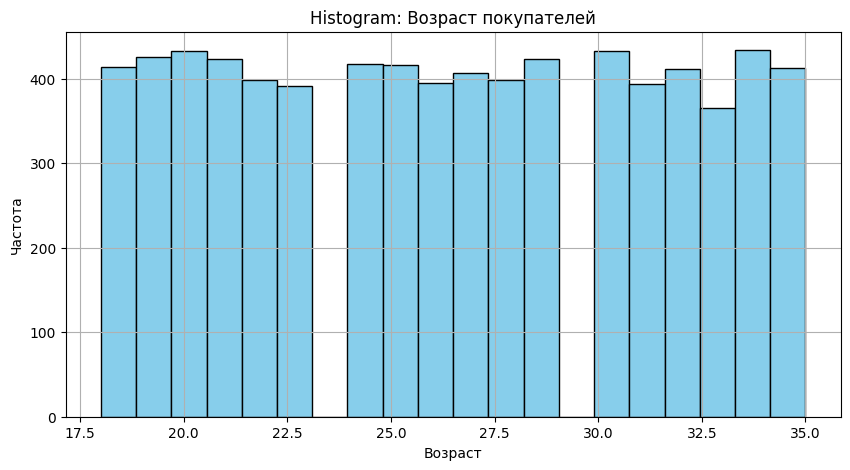

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(dt['Buyer Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram: Возраст покупателей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid()
plt.show()


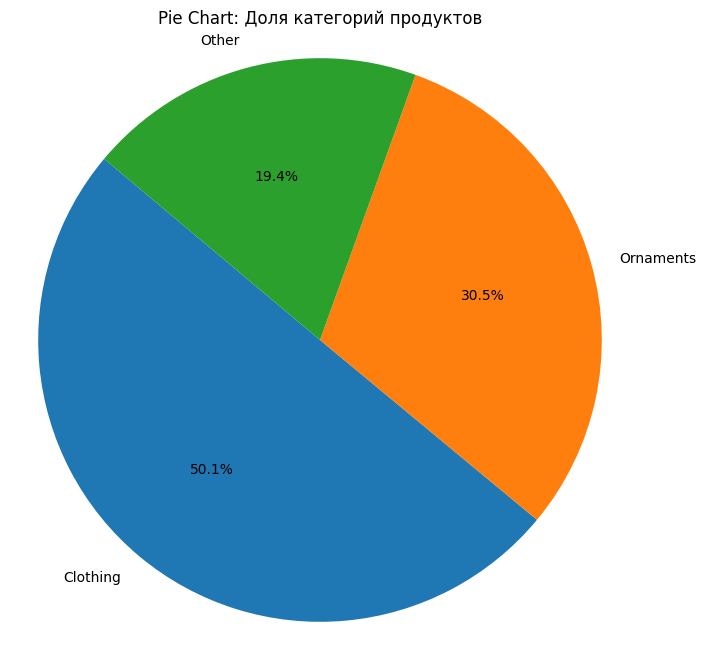

In [22]:
category_counts = dt['Product Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Доля категорий продуктов')
plt.axis('equal')  # Чтобы круг был кругом
plt.show()


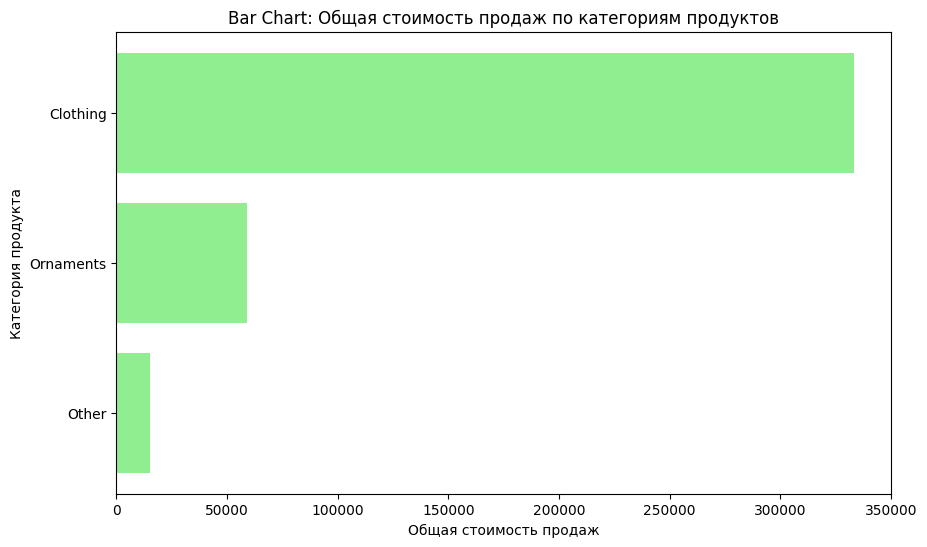

In [23]:
category_sales = dt.groupby('Product Category')['Sales Price'].sum().sort_values()
plt.figure(figsize=(10, 6))
plt.barh(category_sales.index, category_sales.values, color='lightgreen')
plt.title('Bar Chart: Общая стоимость продаж по категориям продуктов')
plt.xlabel('Общая стоимость продаж')
plt.ylabel('Категория продукта')
plt.show()
